In [1]:
import tellurium as te

In [2]:
# model from https://academic.oup.com/endo/article/157/2/624/2422698

r = te.loada("""
species $G; species $I; species $beta;

//rates
G' = R0 - (EG0 + SI*I)*G; // glucose concentration in blood (mg/dL)
I' = beta*ISR/V - k*I; // insulin concentration in blood
beta' = ((P - A)*beta)/tau_beta; // beta cell mass - based on workload hypothesis
// functional compensation - persistent high glucose shifts the glucose response curve to the left
gam' = (gam_inf - gam)/tau_gam;
// persistent high glucose increases maximal insulin concentration
// TODO: making this static for now because G_sigmas isn't provided in the paper?
sigma' = (sigma_inf - sigma)/tau_sigma; //sigma is
SI' = (S0 - SI)/tau_SI; // insulin sensitivity

// auxiliary functions
M := G^kM/(alpha_M^kM + G^kM); // beta cell metabolism
ISR := sigma*(M + gam)^kISR/(alpha_ISR^kISR + (M + gam)^kISR); // insulin secretion rate

P := P_max*(ISR^kP/(alpha_P^kP + ISR^kP)); // beta cell proliferation
A := A_max*(M^kA/(alpha_A^kA + M^kA)); // beta cell apoptosis

gam_inf := gam_max/(1 + exp((G - gam_s)/gam_n)) - gam_0;

// sigma calculation
sigma_inf := sigma_ISRinf*sigma_Minf + sigma_b;
sigma_ISRinf := sigma_ISRmax/(1 + sigma_ISRk*exp(-(ISR_sigma - sigma_ISRs)/sigma_ISRs));
sigma_Minf := 1 - sigma_Mmax/(1 + sigma_Mmax*exp(-(M_sigma - sigma_Ms)/sigma_Ms));
M_sigma := (G-G_sigmas)^kM/(alpha_M^kM + (G-G_sigmas)^kM);
ISR_sigma := sigma*(M_sigma + gam)^kISR/(alpha_ISR^kISR + (M_sigma + gam)^kISR);

// parameters
S0 = 0.72;
EG0 = 1.44;
R0 = 864;
V = 0.01;
k = 700;

// time scales (in days)
tau_gam = 2.14;
tau_sigma = 10.71;
tau_beta = 42.85;
tau_SI = 16.2;

// auxilliary function parameters (based on zdf rats)
kM = 2;
alpha_M = 150;
kISR = 2;
alpha_ISR = 1.2;
P_max = 4.55;
kP = 4;
alpha_P = 41.77;
A_max = 3.11;
kA = 6;
alpha_A = 0.44;
A_b = 0.8;
gam_max = 0.2;
gam_s = 99.9;
gam_n = 1;
gam_0 = 0.1;
sigma_ISRmax = 867.6;
sigma_ISRs = 0.1;
sigma_ISRn = 0.1;
sigma_ISRk = 1;
sigma_b = 3;
sigma_Mmax = 1;
sigma_Ms = 0.2;
sigma_Mm = 0.02;
sigma_Mk = 0.2;

// TODO: this value isn't provided in the paper.
G_sigmas := 99.9;


//initial values
beta = 300;
G = 100;
I = 0;
sigma = sigma_b;
gam = gam_0;
SI = S0;

G is "plasma glucose concentration (mg/dL)";
I is "plasma insulin concentration (microU/mL)";
beta is "beta cell mass (mg)";
gam is "dose response curve shift";
sigma is "beta cell function (microU/(microg*d))";
SI is "insulin sensitivity (mL/(microU*d))";

R0 is "average daily glucose production rate";
EG0 is "insulin-independent glucose disposal rate";
S0 is "initial insulin sensitivity";
V is "volume of distribution";
k is "insulin clearance rate";
""")

In [3]:
result = r.simulate(0, 80)

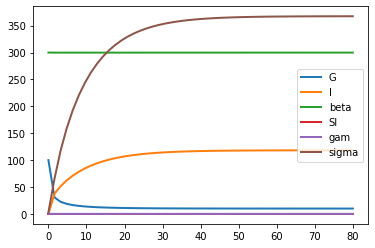

In [4]:
# physiological steady state: beta = 300, G = 100, I = 10
r.plot(result)

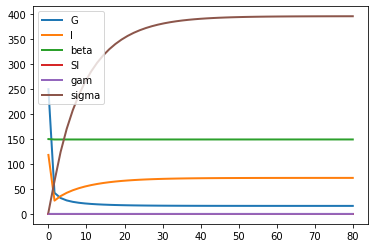

In [5]:
# Try some different values: G = 150?
r.resetAll()
r.setValue('G', 250)
r.setValue('beta', 150)
result = r.simulate(0, 80)
r.plot(result)

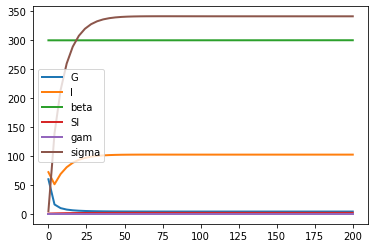

In [6]:
# Try some different values: G = 150?
r.resetAll()
r.setValue('S0', 2)
r.setValue('P_max', 10)
r.setValue('A_max', 1)
r.setValue('G', 60)
r.setValue('sigma', 5)
r.setValue('beta', 300)
result = r.simulate(0, 200)
r.plot(result)

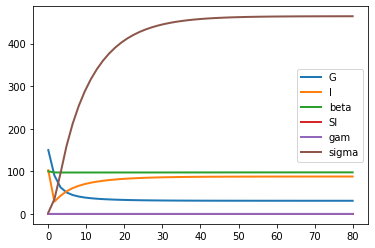

In [7]:
# Try some different values: what can cause a pathological state?
r.resetAll()
r.setValue('G', 150)
r.setValue('beta', 100)
r.setValue('R0', 2000)
result = r.simulate(0, 80)
r.plot(result)

## Human model

Source: https://github.com/artielbm/artielbm.github.io/blob/master/Models/Pathogenesis/human.ode

In [ ]:
r_human = te.loada("""
species $G; species $I; species $beta;

//rates
G' = R0 - (EG0 + SI*I)*G; // glucose concentration in blood (mg/dL)
I' = beta*ISR/V - k*I; // insulin concentration in blood
beta' = ((P - A)*beta)/tau_beta; // beta cell mass - based on workload hypothesis
// functional compensation - persistent high glucose shifts the glucose response curve to the left
gam' = (gam_inf - gam)/tau_gam;
// persistent high glucose increases maximal insulin concentration
// TODO: making this static for now because G_sigmas isn't provided in the paper?
//sigma' = (sigma_inf - sigma)/tau_sigma; //sigma is
SI' = (S0 - SI)/tau_SI; // insulin sensitivity

// auxiliary functions
M := G^kM/(alpha_M^kM + G^kM); // beta cell metabolism
ISR := sigma*(M + gam)^kISR/(alpha_ISR^kISR + (M + gam)^kISR); // insulin secretion rate

P := P_max*(ISR^kP/(alpha_P^kP + ISR^kP)); // beta cell proliferation
A := A_max*(M^kA/(alpha_A^kA + M^kA)); // beta cell apoptosis

gam_inf := gam_max/(1 + exp((G - gam_s)/gam_n)) - gam_0;

// sigma calculation
sigma_inf := sigma_ISRinf*sigma_Minf + sigma_b;
sigma_ISRinf := sigma_ISRmax/(1 + sigma_ISRk*exp(-(ISR_sigma - sigma_ISRs)/sigma_ISRs));
sigma_Minf := 1 - sigma_Mmax/(1 + sigma_Mmax*exp(-(M_sigma - sigma_Ms)/sigma_Ms));
M_sigma := (G-G_sigmas)^kM/(alpha_M^kM + (G-G_sigmas)^kM);
ISR_sigma := sigma*(M_sigma + gam)^kISR/(alpha_ISR^kISR + (M_sigma + gam)^kISR);

// parameters
S0 = 0.72;
EG0 = 1.44;
R0 = 864;
V = 0.01;
k = 700;

// time scales (in days)
tau_gam = 2.14;
tau_sigma = 10.71;
tau_beta = 42.85;
tau_SI = 16.2;

// auxilliary function parameters (based on zdf rats)
kM = 2;
alpha_M = 150;
kISR = 2;
alpha_ISR = 1.2;
P_max = 4.55;
kP = 4;
alpha_P = 41.77;
A_max = 3.11;
kA = 6;
alpha_A = 0.44;
A_b = 0.8;
gam_max = 0.2;
gam_s = 99.9;
gam_n = 1;
gam_0 = 0.1;
sigma_ISRmax = 867.6;
sigma_ISRs = 0.1;
sigma_ISRn = 0.1;
sigma_ISRk = 1;
sigma_b = 3;
sigma_Mmax = 1;
sigma_Ms = 0.2;
sigma_Mm = 0.02;
sigma_Mk = 0.2;

// TODO: this value isn't provided in the paper.
G_sigmas := G;


//initial values
beta = 300;
G = 100;
I = 0;
sigma = sigma_b;
gam = gam_0;
SI = S0;

G is "plasma glucose concentration (mg/dL)";
I is "plasma insulin concentration (microU/mL)";
beta is "beta cell mass (mg)";
gam is "dose response curve shift";
sigma is "beta cell function (microU/(microg*d))";
SI is "insulin sensitivity (mL/(microU*d))";

R0 is "average daily glucose production rate";
EG0 is "insulin-independent glucose disposal rate";
S0 is "initial insulin sensitivity";
V is "volume of distribution";
k is "insulin clearance rate";
""")